# Illya-BOICHUK-Camp-2025

## Answer

### Iris dataset

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

np.random.seed(2000)
iris = load_iris()
print('data contains:', iris.keys())
X, y, labels, feature_names = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['label'] = y
features_dict = {k: v for k, v in enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k_values = range(1, 31) 
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

k_best = k_values[np.argmax(scores)]
score_best = max(scores)

print('The best k = {}, score = {:.4f}'.format(k_best, score_best))

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
The best k = 17, score = 1.0000


### Synthetic dataset

The best k = 3, score = 0.9067


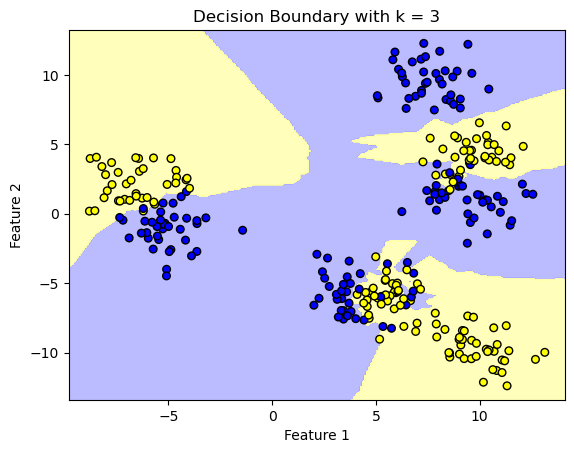

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

np.random.seed(2000)
X_D2, y_D2 = make_blobs(n_samples=300, n_features=2, centers=8, cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.25, random_state=2021)
k_values = range(1, 31)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
k_best = k_values[np.argmax(scores)]
score_best = max(scores)
print('The best k = {}, score = {:.4f}'.format(k_best, score_best))
cmap_bold = ListedColormap(['blue', '#FFFF00'])
cmap_light = ListedColormap(['#AAAAFF', '#FFFFAA'])
h = 0.1 
x_min, x_max = X_D2[:, 0].min() - 1, X_D2[:, 0].max() + 1
y_min, y_max = X_D2[:, 1].min() - 1, X_D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, cmap=cmap_bold, edgecolor='k', s=30)
plt.title(f'Decision Boundary with k = {k_best}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()